<a href="https://colab.research.google.com/github/ashish-ty/Image_Restoration/blob/main/project_1_denoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train/255, x_test/255

4431872/4422102 [==============================] - 0s 0us/step


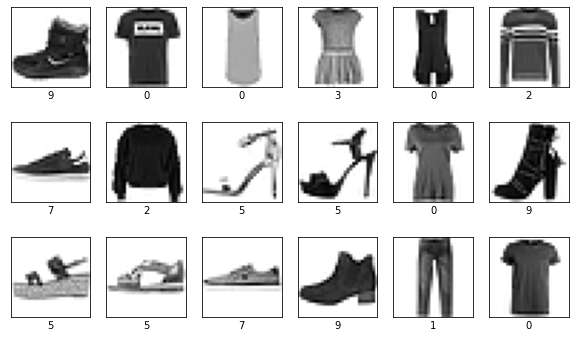

In [ ]:
class_names = list(range(10))
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
noise_fact_val = 0.2

x_train_noise = x_train + noise_fact_val*np.random.normal(loc=0.0, scale=1.0,size=x_train.shape)
x_test_noise = x_test + noise_fact_val*np.random.normal(loc=0.0, scale=1.0,size=x_test.shape) 

x_train_noise = np.clip (x_train_noise, 0., 1.)
x_test_noise = np.clip (x_test_noise, 0., 1.)

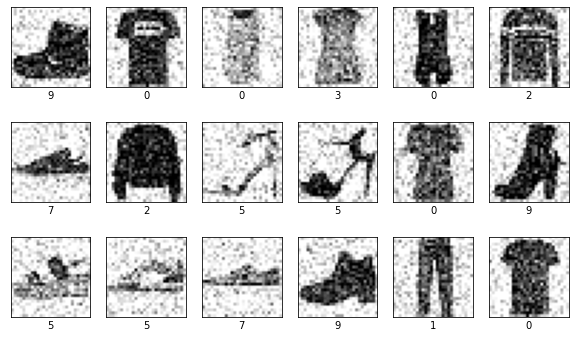

In [ ]:
class_names = list(range(10))
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_noise[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = models.Sequential()

#encode

model.add(layers.Conv2D(64, (7, 7), strides = 1, padding = 'same', activation='relu',input_shape = (28, 28, 1)))
model.add(layers.Conv2D(32, (7, 7), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2D(3, (5, 5), strides = 1, padding = 'same',activation='relu'))

#latent
# model.add(layers.Conv2D(8, (2, 2), strides = 1, padding = 'same'))

#decode
model.add(layers.Conv2DTranspose(3, (5, 5), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(32, (7, 7), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(64, (7, 7), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(1, (1, 1), strides = 1, activation = 'sigmoid', padding = 'same'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        100384    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 3)         2403      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 3)         228       
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 28, 28, 32)        4736      
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 28, 28, 64)        100416    
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 1)        

In [ ]:
model.compile(loss = 'mse', optimizer = 'adam',metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    model.fit(x_train_noise.reshape(-1, 28, 28, 1), x_train.reshape(-1, 28, 28, 1), epochs = 30, batch_size = 2000, 
              validation_data = (x_test_noise.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/30
30/30 [==============================] - 83s 1s/step - loss: 0.0950 - accuracy: 0.4876 - val_loss: 0.0501 - val_accuracy: 0.4951
Epoch 2/30
30/30 [==============================] - 41s 1s/step - loss: 0.0384 - accuracy: 0.4987 - val_loss: 0.0274 - val_accuracy: 0.5021
Epoch 3/30
30/30 [==============================] - 41s 1s/step - loss: 0.0297 - accuracy: 0.5024 - val_loss: 0.0221 - val_accuracy: 0.5037
Epoch 4/30
30/30 [==============================] - 41s 1s/step - loss: 0.0184 - accuracy: 0.5075 - val_loss: 0.0149 - val_accuracy: 0.5064
Epoch 5/30
30/30 [==============================] - 42s 1s/step - loss: 0.0128 - accuracy: 0.5090 - val_loss: 0.0114 - val_accuracy: 0.5069
Epoch 6/30
30/30 [==============================] - 41s 1s/step - loss: 0.0106 - accuracy: 0.5094 - val_loss: 0.0096 - val_accuracy: 0.5073
Epoch 7/30
30/30 [==============================] - 42s 1s/step - loss: 0.0095 - accuracy: 0.5095 - val_loss: 0.0094 - val_accuracy: 0.5074
Epoch 8/30
30/30 [==

In [ ]:
#utility function to pick samples to be tested
def get_samples(arr, n):
    temp = random.sample(range(len(arr)), n)
    result = arr[temp]
    return result, temp

In [ ]:
num = 10
org, temp = get_samples(x_train, num)
noise = x_train_noise[temp]
preds = model.predict(noise.reshape(-1, 28, 28, 1))
preds = preds.reshape(-1, 28, 28)

Original Images


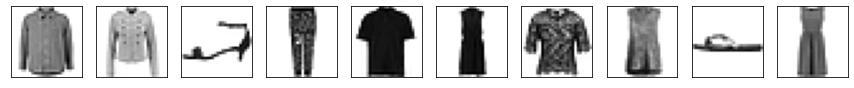

Images with noise


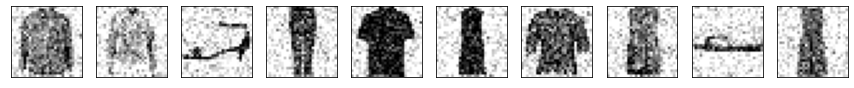

Predicted Images


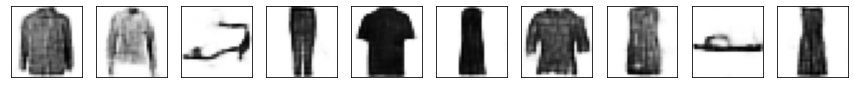

In [ ]:
plt.figure(figsize = (15, 15))
print('Original Images')
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(org[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Images with noise')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noise[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Predicted Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preds[i], cmap=plt.cm.binary)
plt.show()